In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data1 = "D600 Task 1, 2 and 3 Dataset Housing Information.csv"
df = pd.read_csv(data1,index_col=0)

In [4]:
print(df)

            Price  SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace  \
ID                                                                           
1     176391.7665        1002.49             1            2         354.22   
2     402358.3158         897.55             5            3         579.57   
3     124287.4584         774.63             2            1        1114.67   
4     396428.1539         550.00             1            4         561.07   
5     208725.8216         614.91             2            2         782.71   
...           ...            ...           ...          ...            ...   
6996  473382.5348        1026.36             2            5         149.31   
6997  104773.5017         550.00             1            3         420.78   
6998  343397.9756        2218.22             1            4         526.81   
6999  151679.9536         888.38             2            1         594.27   
7000  438060.8193        1553.57             4            4     

In [5]:
df.isna().sum() 

Price                    0
SquareFootage            0
NumBathrooms             0
NumBedrooms              0
BackyardSpace            0
CrimeRate                0
SchoolRating             0
AgeOfHome                0
DistanceToCityCenter     0
EmploymentRate           0
PropertyTaxRate          0
RenovationQualityRate    0
LocalAmenities           0
TransportAccess          0
Fireplace                0
HouseColor               0
Garage                   0
Floors                   0
Windows                  0
PreviousSalePrice        0
IsLuxury                 0
dtype: int64

In [6]:
independent_var = [
    "SquareFootage",
    "BackyardSpace",
    "DistanceToCityCenter",
    "PreviousSalePrice",
    "AgeOfHome"
]

for var in independent_var:
    if var is not object:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[var] = df[var].clip(lower_bound, upper_bound)
df.describe()

,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQualityRate,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice,IsLuxury
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.00000
mean,3.072820e+05,1048.205148,2.117857,3.008571,511.179370,31.226194,6.949571,46.708260,17.445281,93.711349,1.500437,5.016857,5.962143,5.988857,1.16300,16.248857,283009.890893,0.50400
std,1.501734e+05,423.448945,1.006889,1.021940,278.892149,18.025327,1.909931,31.498561,11.931777,4.505359,0.498591,1.974766,2.641805,1.970896,0.37209,8.926479,180819.621714,0.50002
min,8.500000e+04,550.000000,1.000000,1.000000,0.390000,0.030000,1.000000,0.010000,0.000000,72.050000,0.010000,1.000000,1.000000,1.000000,1.00000,-6.000000,-8356.902464,0.00000
25%,1.921075e+05,660.815000,1.000000,2.000000,300.995000,17.390000,6.000000,20.755000,7.827500,90.620000,1.160000,4.000000,4.000000,5.000000,1.00000,11.000000,142013.977225,0.00000
50%,2.793230e+05,996.320000,2.000000,3.000000,495.965000,30.385000,7.000000,42.620000,15.625000,94.010000,1.490000,5.000000,6.000000,6.000000,1.00000,15.000000,262183.133450,1.00000
75%,3.918781e+05,1342.292500,3.000000,4.000000,704.012500,43.670000,8.000000,67.232500,25.222500,97.410000,1.840000,6.000000,8.000000,7.000000,1.00000,20.000000,396121.169350,1.00000
max,1.046676e+06,2364.508750,6.000000,7.000000,1308.538750,99.730000,10.000000,136.948750,51.315000,99.900000,3.360000,10.000000,10.000000,10.000000,3.00000,63.000000,777281.957537,1.00000


In [7]:
df.dtypes

Price                    float64
SquareFootage            float64
NumBathrooms               int64
NumBedrooms                int64
BackyardSpace            float64
CrimeRate                float64
SchoolRating               int64
AgeOfHome                float64
DistanceToCityCenter     float64
EmploymentRate           float64
PropertyTaxRate          float64
RenovationQualityRate      int64
LocalAmenities             int64
TransportAccess            int64
Fireplace                 object
HouseColor                object
Garage                    object
Floors                     int64
Windows                    int64
PreviousSalePrice        float64
IsLuxury                   int64
dtype: object

In [8]:
pred_vars = [ #variables selected to use for analysis
    "SquareFootage","NumBathrooms","NumBedrooms","BackyardSpace","CrimeRate","SchoolRating","AgeOfHome","DistanceToCityCenter",
    "EmploymentRate","PropertyTaxRate","RenovationQualityRate","LocalAmenities","TransportAccess","Floors","Windows","PreviousSalePrice"]
df_pred = df[pred_vars].copy() # updating dataframe to hold only select few so other variables not changed
df_pred.isna().sum() #


SquareFootage            0
NumBathrooms             0
NumBedrooms              0
BackyardSpace            0
CrimeRate                0
SchoolRating             0
AgeOfHome                0
DistanceToCityCenter     0
EmploymentRate           0
PropertyTaxRate          0
RenovationQualityRate    0
LocalAmenities           0
TransportAccess          0
Floors                   0
Windows                  0
PreviousSalePrice        0
dtype: int64

In [9]:
df_pred

,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQualityRate,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice
ID,,,,,,,,,,,,,,,,
1,1002.49,1,2,354.22,44.61,8,106.01,26.79,94.32,1.36,3,6,4,1,0,165208.58650
2,897.55,5,3,579.57,41.05,6,13.77,24.40,86.13,1.76,5,6,4,1,17,524019.64430
3,774.63,2,1,1114.67,49.10,8,22.59,8.74,99.90,1.84,6,6,6,1,15,76449.70980
4,550.00,1,4,561.07,29.17,7,104.06,2.94,94.05,1.07,7,6,6,1,10,491021.51710
5,614.91,2,2,782.71,63.76,8,22.15,15.01,99.90,1.88,4,4,6,2,28,142189.92140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,1026.36,2,5,149.31,0.10,9,31.79,11.59,94.57,1.45,5,7,3,1,13,380555.49390
6997,550.00,1,3,420.78,41.66,3,128.40,50.45,89.11,1.77,1,1,3,2,26,22636.84356
6998,2218.22,1,4,526.81,11.18,9,15.21,3.96,99.90,1.52,5,8,6,1,10,442610.31710


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
df1 = df_pred[[
    "CrimeRate",
    "SchoolRating",
    "EmploymentRate",
    "LocalAmenities",
    "TransportAccess",
    "SquareFootage",
    "BackyardSpace",
    "RenovationQualityRate",
    "DistanceToCityCenter",
    "PropertyTaxRate",
    "NumBedrooms",
    "PreviousSalePrice",
    "AgeOfHome"
]].copy().reset_index(drop=True)

df_normalized = StandardScaler().fit_transform(df1) #standardizing predictors
pc_cols = [f"PC{i+1}" for i in range(df1.shape[1])] #creating PC names for number of predictors
pca = PCA(n_components=df1.shape[1]) #using PCA to compute all PC
pca.fit(df_normalized) # fitting normalized data in pca for calculation
df_pca = pd.DataFrame(pca.transform(df_normalized), columns=pc_cols) # converts standard predictors into principal component scores with labels of pc_cols names
loadings = pd.DataFrame(pca.components_.T, columns=pc_cols, index=df1.columns) #creating a matrix with fit normalized data using numpy array
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
CrimeRate,-0.123295,0.005857,0.605683,-0.069576,0.098722,-0.191330,0.632231,-0.167300,-0.308638,0.172613,0.000759,-0.116592,0.019119
SchoolRating,0.398497,-0.136012,-0.150445,0.207409,-0.136294,-0.003048,0.023448,0.096423,0.014903,0.583359,0.017952,-0.611960,0.115189
EmploymentRate,0.140544,-0.029444,-0.560258,0.355833,0.131011,-0.247960,0.364893,-0.389272,-0.252343,-0.331884,0.007270,-0.040829,0.001986
LocalAmenities,0.214110,0.663510,0.068149,0.045183,0.005042,-0.037392,-0.037380,0.020546,-0.015157,-0.062581,-0.700600,-0.092844,-0.019385
TransportAccess,0.215022,0.662720,0.061509,0.052813,-0.009095,-0.034845,-0.027207,0.028307,-0.026941,-0.019603,0.709739,-0.000752,-0.017792
SquareFootage,0.344598,-0.180736,0.287846,-0.131539,0.313906,-0.150455,-0.292509,-0.366358,0.197460,-0.236153,0.038058,-0.296970,-0.472310
BackyardSpace,0.096719,0.026950,-0.185212,-0.215127,0.776579,0.421419,0.204469,0.281290,-0.053520,0.052994,0.004770,-0.039981,0.021005
RenovationQualityRate,0.422554,-0.070441,0.034340,0.158853,0.091618,-0.040167,0.021483,-0.170565,0.037750,0.469556,-0.059149,0.706054,-0.163076
DistanceToCityCenter,-0.209749,0.039074,0.088629,0.462428,0.223208,-0.235614,0.228080,0.190691,0.733938,-0.011390,0.005213,-0.010801,0.011224
PropertyTaxRate,-0.151656,0.049457,0.190322,0.439901,-0.016406,0.711342,-0.071440,-0.469982,0.029275,0.002784,0.004553,-0.064278,0.086826


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns #graphing libraries
cov_matrix = np.dot(df_normalized.T, df_normalized)/df1.shape[0] # Performing matrix multiplication to divide by number of observations
eigenvalues = [np.dot(eigenvector .T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_] 
# mult ovariance matrix by the eigenvector 

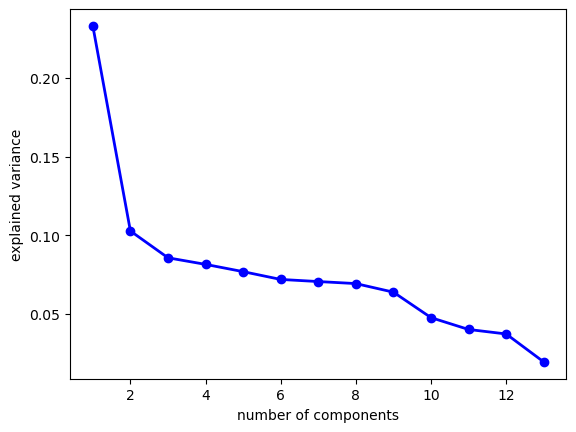

In [12]:
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.plot(np.arange(pca.n_components_)+1, pca.explained_variance_ratio_,'o-', linewidth=2, color='blue')
plt.show()

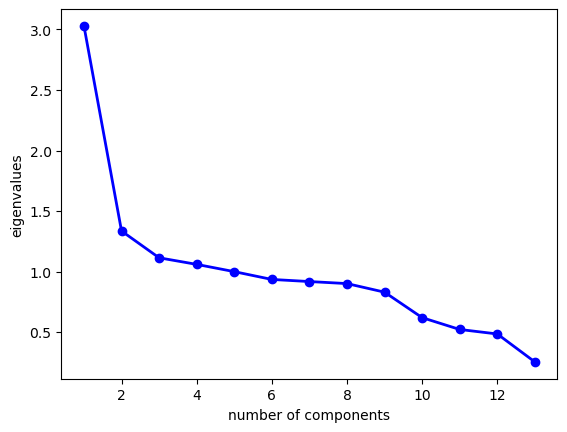

In [14]:
plt.xlabel('number of components') 
plt.ylabel('eigenvalues') 
plt.plot(np.arange(pca.n_components_) + 1, eigenvalues, 'o-', linewidth=2, color='blue') #This allows for the x-axis to begin with 1 not 0
plt.show() 

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio per component:", explained_variance_ratio)

Explained Variance Ratio per component: [0.23300709 0.10270629 0.08568007 0.08149571 0.0768807  0.07192536
 0.0705866  0.06929469 0.06383592 0.04765435 0.04013653 0.03728077
 0.01951593]


In [16]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.23300709 0.33571338 0.42139345 0.50288916 0.57976986 0.65169522
 0.72228182 0.79157651 0.85541243 0.90306677 0.9432033  0.98048407
 1.        ]


In [17]:
import statsmodels.api as sm

y = df["Price"] # using price variable that is not changed

desired_components = 2 # elbow rule show 2 is the desired component
pca = PCA(n_components=desired_components) # initializing PCA dimensions
X_pca = pca.fit_transform(df_normalized) #

X_pca_const = sm.add_constant(X_pca) #creating baseline
model = sm.OLS(y, X_pca_const) # defining regression model
result =  model.fit() #computing regression for coefficients and gets statistics on moel
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     4288.
Date:                Fri, 20 Feb 2026   Prob (F-statistic):               0.00
Time:                        03:28:30   Log-Likelihood:                -90569.
No. Observations:                7000   AIC:                         1.811e+05
Df Residuals:                    6997   BIC:                         1.812e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.073e+05   1203.278    255.371      0.0

In [18]:
rmse = np.sqrt(np.mean(result.resid**2))
rmse

np.float64(100651.92124289565)

In [19]:
df.to_csv("Cleaned_data.csv", index=False )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cov_matrix = np.dot(df_normalized.T, df_normalized)/df1.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.plot(np.arange(pca.n_components_)+1, eigenvalues, 'o-', linewidth=2, color='blue')
plt.show()

In [ ]:
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.plot(np.arange(pca.n_components_)+1, pca.explained_variance_ratio_,'o-', linewidth=2, color='blue')
plt.show()

In [ ]:
df.to_csv("Cleaned_data.csv", index=False )